In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('05.2023.xls', index_col = 0)
copy_df = df

In [3]:
copy_df = copy_df.reset_index(drop = True)

In [4]:
copy_df['Описание']

0       Технический Пользователь SAP 01.05.2023 03:22:...
1       Технический Пользователь SAP 01.05.2023 05:20:...
2       Технический Пользователь SAP 01.05.2023 08:21:...
3       Технический Пользователь SAP 01.05.2023 02:22:...
4       SOLMAN SM_BACK_USR 01.05.2023 04:36:54\nSAP HR...
                              ...                        
3897    Валерия Михайловна Рымчук 31.05.2023 20:34:13\...
3898    Валерия Михайловна Рымчук 31.05.2023 19:59:23\...
3899    Технический Пользователь SAP 31.05.2023 23:35:...
3900    SOLMAN SM_BACK_USR 31.05.2023 20:13:37\n1570_Р...
3901    SOLMAN SM_BACK_USR 31.05.2023 23:23:27\n1378_р...
Name: Описание, Length: 3902, dtype: object

In [5]:
data = copy_df['Описание']
for i in range(len(data)):
    j = 0
    count_n = 0
                
    while (count_n != 2 and j < len(data[i])):
        if (data[i][j] == '\n'):
            count_n+=1
        j+=1
    if (count_n == 1):
        continue
    else: data[i] = data[i][j:len(data[i])]

In [6]:
data

0       Name....................ABAP Job\r\nStart Time...
1       Name....................ABAP Job\r\nStart Time...
2       Name....................ABAP Job\r\nStart Time...
3       Name....................ABAP Job\r\nStart Time...
4       Добрый день.\r\nНе рассчитывается зп за апрель...
                              ...                        
3897    По БЕ 1773 ТН 7402009 сторнируется МП по БЛ за...
3898    При продуктивном расчёте выходят ошибки.\r\n\r...
3899    Name....................ABAP Job\r\nStart Time...
3900    Добрый день.\r\nПри расчете заработной платы п...
3901    Добрый день! При рег. расчете ТН 450301 выпада...
Name: Описание, Length: 3902, dtype: object

In [7]:
i = 0
indexs = []
while i < len(data):
    if (data[i][0] == 'N'):
        indexs.append(i)
    i+=1

In [8]:
for k in indexs:
    data = data.drop(index=k)
data = data.reset_index(drop=True)

In [9]:
data

0       Добрый день.\r\nНе рассчитывается зп за апрель...
1       Прошу проверить и синхронизировать контрагента...
2       \r\nC уважением,\r\nРеудина Юлия Сергеевна\r\n...
3       Добрый день.\r\nУ ТН 2302177 рассчитались огро...
4       Добрый день !\r\nПодскажите пожалуйста, по как...
                              ...                        
3735    БЕ 1778\r\nТН 7921659\r\nДобрый день, после пр...
3736    По БЕ 1773 ТН 7402009 сторнируется МП по БЛ за...
3737    При продуктивном расчёте выходят ошибки.\r\n\r...
3738    Добрый день.\r\nПри расчете заработной платы п...
3739    Добрый день! При рег. расчете ТН 450301 выпада...
Name: Описание, Length: 3740, dtype: object

In [10]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

text = data[0]

def lemmatize(text):
    words = tokenizer.tokenize(text) # разбиваем текст на слова
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res
#lemmatize('прив')

In [26]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
#sent = copy_df['Описание']
#tokenizer = RegexpTokenizer(r'\w+')
#print(tokenizer.tokenize(sent))

vocab = Counter()
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(data)):
    for word in tokenizer.tokenize(data[i]):
        count_word = lemmatize(word)
        p = morph.parse(count_word[0])[0]
        if (p.tag.POS != 'PREP'):
            vocab[count_word[0]]+=1        

In [23]:
p = morph.parse('зп')[0]
print(p.tag.POS)

None


In [28]:
vocab

Counter({'добрый': 1976,
         'день': 2413,
         'не': 2557,
         'рассчитываться': 43,
         'зп': 124,
         'апрель': 238,
         'тн': 1265,
         '2300425': 1,
         'ошибка': 1054,
         'нвозможный': 1,
         'считать': 12,
         'результат': 39,
         'расчёт': 1313,
         'зарплата': 29,
         'просить': 1536,
         'помочь': 402,
         'разобраться': 130,
         'и': 2254,
         'устранить': 61,
         'причина': 258,
         'проверить': 137,
         'синхронизировать': 188,
         'контрагент': 116,
         '02124503': 1,
         'завести': 81,
         'а': 746,
         'sap': 558,
         'hr2': 393,
         'отражаться': 45,
         'c': 184,
         'уважение': 922,
         'реудин': 3,
         'юлия': 90,
         'сергеевич': 96,
         'главный': 227,
         'специалист': 669,
         'отдел': 681,
         'учёт': 1180,
         'персонал': 949,
         'управление': 553,
         'филиал': 

In [30]:
def get_word_2_index(vocab):
    word2index = {}
    for i,word in enumerate(vocab):
        word2index[word] = i
        
    return word2index

In [46]:
import datetime

e = []
date = sent[5].split()
if (len(date[2].split('.')) == 3):
    e.append(date[2]+' '+date[3])
e

['01.05.2023 05:18:26']

In [6]:
x = []
y = []
for i in range(len(copy_df['Описание'])):
    date = sent[i].split()
    j = 0
    while j < len(date): 
        if (len(date[j].split('.')) == 3):
            x.append(date[j+1])
            break
        j = j+1

In [7]:
import datetime
count_hour = {
    "0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0, "7":0, "8":0, "9":0, "10":0, "11":0, "12":0,
    "13":0, "14":0, "15":0, "16":0, "17":0, "18":0, "19":0, "20":0, "21":0, "22":0, "23":0
}
for i in range(len(x)):
    d = datetime.datetime.strptime(x[i], '%H:%M:%S')
    count_hour[str(d.time().hour)] += 1

j = 0
while (j < len(count_hour)):
    y.append(count_hour[str(j)])
    j += 1

In [8]:
x1 = [i for i in range(24)]

([<matplotlib.axis.YTick at 0x2f5a87a2a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

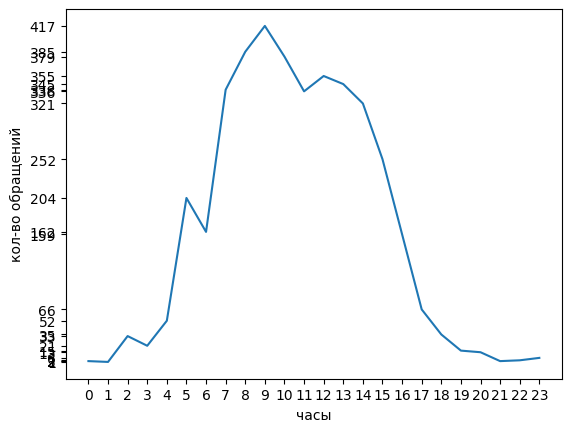

In [20]:
dataframe = pd.DataFrame({'index':x1, 'value':y})
#dataframe['index'] = pd.to_datetime(dataframe['index'])
dataframe.set_index(dataframe['index'])
plt.plot(dataframe.index, dataframe['value'])
plt.xlabel('часы')
plt.ylabel('кол-во обращений')
plt.xticks(ticks=x1)
plt.yticks(ticks=y)